# HW2: Data Visualization (70 pts)

This problem set has 3 parts.

## Submit Instruction:

Please restart the kernel and run all before you submit. Submit an .ipynb file to Gradescope by 11:59pm, April 21. 

In [160]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Part 1 Visualize the displacement of an object (40pts)


In this part, we are going to visualize the kinematics equation.

Kinematics equation is
$$Y = v_0t + 1/2gt^2,$$ 
where Y represents the displacement of an object in motion, where $v_0$ is the initial velocity, $t$ is the time, and $g=-9.81$ is the acceleration due to gravity.

The goal of this part is to create an animation for moving object. You should write your result as a function which takes 4 inputs (all of them are scalars):

- `v1`: initial value for the first moving object 
- `v2`: initial value for the second moving object 
- `t`: end point of time interval 
- `N`: number of discrete points between time [0,t] 


The output of your function is an animation. Your output should look like the following picture:
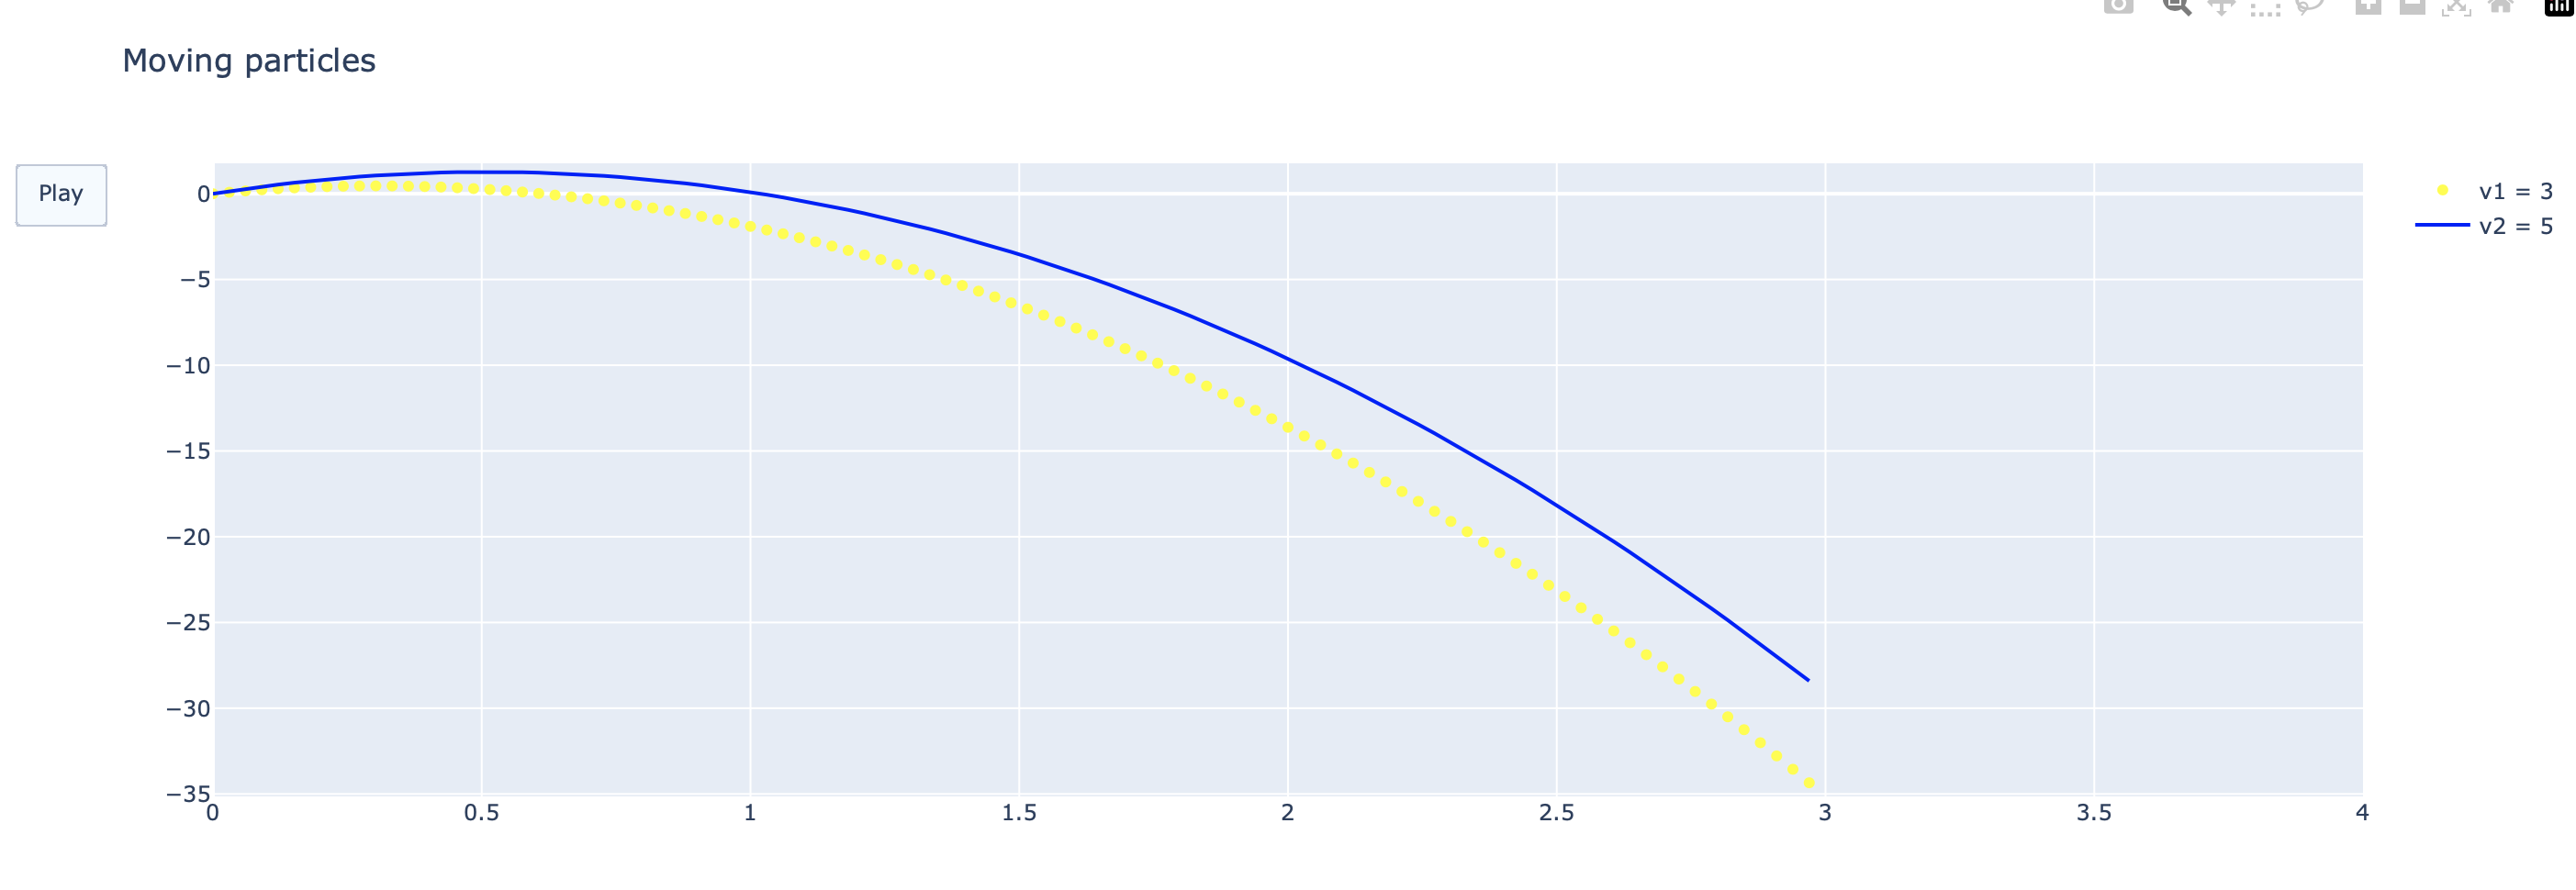

To receive full credits, your code/result should meet the following requirements:
1. It should contain two traces fully for any given initial velocities. In other words, you should adjust xaxis range and yaxis range accordingly. (5pts)
2. One trace contains marker (5pts) and another contains line (5pts).
3. When I play the animation, two traces should be updated at the same time. Updating one by one will cause a grade deduction. (10pts)
4. For each point in the plot, only Y value appear. (5pts)
5. Your plot should be clear, for example, you should change your legend according to your speed. (5pts)
6. Your code should contain necessary comment to explain each step. (5pts)
7. Your code should be able to generalize to any given initial values. In other words, when I change initial values, all above requirements should always be satisfied.

Here, we only consider two traces. Ideally, you are expected to know how to generalize your function to multiple traces (more than 2). 

You have the freedom to set up other features such as line width, marker size, moving speed, play button position, plot title, and etc. But you have to make sure that your plot is clear enough. For example, extremely large marker is not acceptable. 

In [161]:
def two_traces(v1, v2, t, N):
    """
    Plot the displacement of two objects over time using Plotly. The first object is represented by a line and the second object is represented by markers.

    Parameters:
    v1 (float): Initial velocity of object 1.
    v2 (float): Initial velocity of object 2.
    t (float): Total time duration.
    N (int): Number of time points.
    """
    # Define the acceleration due to gravity
    g = -9.81

    # Create an array of time points
    t_values = np.linspace(0, t, N)

    # Calculate the displacements for the two objects
    y1_values = v1 * t_values + 0.5 * g * t_values**2
    y2_values = v2 * t_values + 0.5 * g * t_values**2

    df1 = pd.DataFrame({'Time': t_values, 'Displacement': y1_values, 'Object': 'Object 1'})
    df2 = pd.DataFrame({'Time': t_values, 'Displacement': y2_values, 'Object': 'Object 2'})

    # Combine the dataframes
    df = pd.concat([df1, df2])

    fig = go.Figure()
    fig.update_layout(height=800)

    # Add scatter traces for each object
    fig.add_trace(go.Scatter(x=df1['Time'], y=df1['Displacement'], mode='lines', name=f'v1 = {v1})'))
    fig.add_trace(go.Scatter(x=df2['Time'], y=df2['Displacement'], mode='markers', name=f'v2 = {v2})'))

    # Adding the animation
    fig.update_layout(updatemenus=[dict(type="buttons",
                                        buttons=[dict(label="Play",
                                                      method="animate",
                                                      args=[None])])],
                      xaxis=dict(range=[0, t+1], autorange=False),
                      yaxis=dict(range=[min(0, df['Displacement'].min()), df['Displacement'].max()+1], autorange=False),
                      title="Displacement of Two Objects Over Time",
                      hovermode="closest")
    frames = [go.Frame(data=[go.Scatter(x=df[df['Object'] == 'Object 1']['Time'][:i+1], 
                                        y=df[df['Object'] == 'Object 1']['Displacement'][:i+1], 
                                        mode='markers'),
                             go.Scatter(x=df[df['Object'] == 'Object 2']['Time'][:i+1],
                                        y=df[df['Object'] == 'Object 2']['Displacement'][:i+1], 
                                        mode='lines')]) 
              for i in range(N)]
    
    fig.frames = frames

    fig.show()

In [162]:
# test example
v1 = 3
v2 = 5
t = 3 
N = 100
two_traces(v1,v2,t,N)

# Part 2: Covid data visualization (20pts)

The goal of this part is to visualize given covid dataset.

In the dataset, there are 243 countries. To save running time, you should select a subset of countries and then produce the output. Also, you are also allowed to select a specific time range since the dataset contains a long time range. Please make sure that your selection is not empty, otherwise your plot is empty.


No need to write a function for this exercise. To receive full credits, your code/result should meet the following requirements:

1. You should select at least 2 countries to produce your plot. (5pts)
2. You should create animation for this part. Both scatter plot and bar plot are accepted. (5pts)
3. Write a short paragraph to describe what you did for data processing (e.g which countries you select or time range you select). (5pts)
4. Please carefully state your result. You should include what kind of plot you create, your observations and etc. Your plot should match your description. (5pts)


Covid dataset: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/global-data.csv

In [163]:
coviddf = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/global-data.csv')
coviddf.head()


Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-05           AF  Afghanistan       EMRO          0   
1    2020-01-12           AF  Afghanistan       EMRO          0   
2    2020-01-19           AF  Afghanistan       EMRO          0   
3    2020-01-26           AF  Afghanistan       EMRO          0   
4    2020-02-02           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [164]:
coviddf = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/global-data.csv')
coviddf.head()

def plot_covid(countries, datestart, dateend, y):
    """
    Plot the number of chosen variable for a list of countries over a specified date range.

    Parameters:
    countries (list): A list of countries to plot.
    datestart (str): The start date for the date range.
    dateend (str): The end date for the date range.
    y (str): The variable to plot. Choices are: 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'.
    """
    # Filter the dataframe for the specified date range
    covid_df_country1 = coviddf[(coviddf['Country'] == countries[0]) & (coviddf['Date_reported'] >= datestart) & (coviddf['Date_reported'] <= dateend)]
    covid_df_country2 = coviddf[(coviddf['Country'] == countries[1]) & (coviddf['Date_reported'] >= datestart) & (coviddf['Date_reported'] <= dateend)]

    covid_filtered = pd.concat([covid_df_country1, covid_df_country2])

    # Create the plot
    fig = go.Figure()
    fig.update_layout(height=800)
    fig.add_trace(go.Scatter(x=covid_df_country1['Date_reported'], y=covid_df_country1[y], mode='lines', name=countries[0]))
    fig.add_trace(go.Scatter(x=covid_df_country2['Date_reported'], y=covid_df_country2[y], mode='lines', name=countries[1]))

    # add animation
    fig.update_layout(updatemenus=[dict(type="buttons",
                                        buttons=[dict(label="Play",
                                                      method="animate",
                                                      args=[None])])],
                                xaxis=dict(range=[datestart, dateend], autorange=False),
                                yaxis=dict(range=[0, covid_filtered[y].max()+1], autorange=False),
                                title=f"{y} over Time",
                                hovermode="closest")
    
    frames = [go.Frame(data=[go.Scatter(x=covid_filtered[covid_filtered['Country'] == countries[0]]['Date_reported'][:i+1],
                                        y=covid_filtered[covid_filtered['Country'] == countries[0]][y][:i+1],
                                        mode='lines'),
                                go.Scatter(x=covid_filtered[covid_filtered['Country'] == countries[1]]['Date_reported'][:i+1],
                                        y=covid_filtered[covid_filtered['Country'] == countries[1]][y][:i+1],
                                        mode='lines')])
                for i in range(len(covid_filtered))]
    fig.frames = frames
    fig.show()

# test example
countries = ['India', 'United States of America']
datestart = '2020-01-01'
dateend = '2023-12-31'
#the choices for y are 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'
y = 'Cumulative_deaths'
plot_covid(countries, datestart, dateend, y)

# Part 3: choropleth for your travel experience (10pts)


Recall choropleth we discussed during the lecture, we will use built-in us state data to visualize your travel experience picture.


In this picture, you need to use three different colors to describe states that you visited (stay less than 2 month), states that you have stayed (more than 2 months), and states that you want to visit in the future, respectively. All other places should be uncolored. 


A US-state.csv file is provided, you are able to modify this file using python command to make coloring simple. 

Dataset: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/states.csv



To receive full credits, you should write a short paragraph to describe what you did for the given csv file and your result. (10pts)


#### Grading policy
1. tiny mistake (e.g. more than 4 color) in your code (5pts)

2. Your code is good but your explanation does not match/ is unclear/ is not well-written. (5pts)

3. No points given if error message shows up or your result is not desired (e.g. empty picture)

My plot are given for your reference: https://htmlpreview.github.io/?https://github.com/liaochunyang/PIC16/blob/main/PIC16B/01_Visualization/cholopath_Liao.html

In my plot, blue means "stayed", red means "visited", and yellow means "want to visit".


In [165]:
state_names = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/states.csv')

def colorstates(states):
    """
    Generate a choropleth map of the United States based on the provided state values.
    1 is states stayed in, 2 is states visited, 3 is states that you want to visit.
    Blue is states stayed in, red is states visited, yellow is states that you want to visit

    Parameters:
    states (dict): A dictionary containing state abbreviations as keys and corresponding values.

    Returns:
    None
    """

    # Merge the state_names dataframe with the states dictionary
    states_df = pd.DataFrame(list(states.items()), columns=['Abbreviation', 'Value'])
    merged_df = pd.merge(state_names, states_df, on='Abbreviation')
    # Create the choropleth map
    fig = px.choropleth(merged_df, locations='Abbreviation', locationmode="USA-states", color='Value', scope="usa", 
                         title='States Map', hover_name='State')

    fig.show()


states = {'CA': 1, 'TN': 2, 'NV': 2, 'NY': 2, 'TX': 2, 'IL': 3, 'FL': 3, 'WA': 3,}
colorstates(states)

With the CSV I simply made it so that the full name of the state appears when hovering over the colored states. This makes
it so that it is easier for a reader to know which states have been visited, what states have been stayed in etc for a given state
if they do not know the location or the abbreviation of the state. To do so I create a dataframe with the given dict and then merge
the new dataframe with the values given by the user with the csv to apply the values to the full list of states. All states that
are not in the dict are given naan values. 